In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('house_price_dataset/train.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

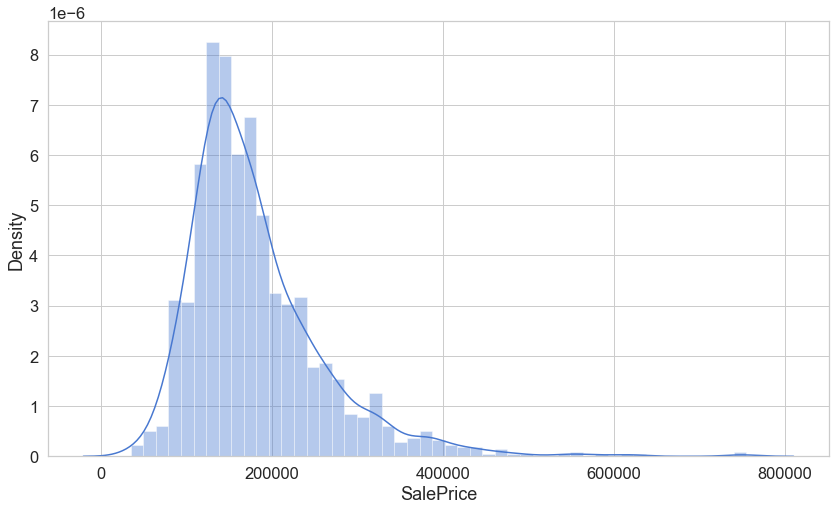

In [8]:
sns.distplot(df_train['SalePrice']);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


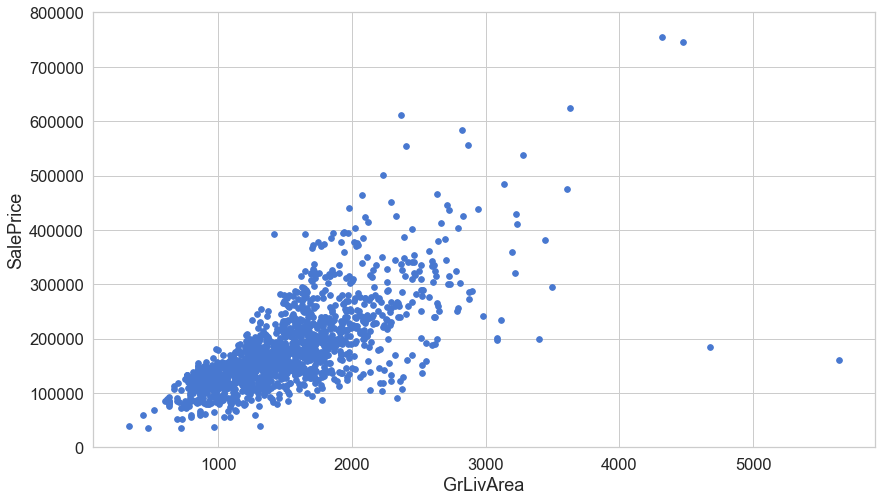

In [9]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


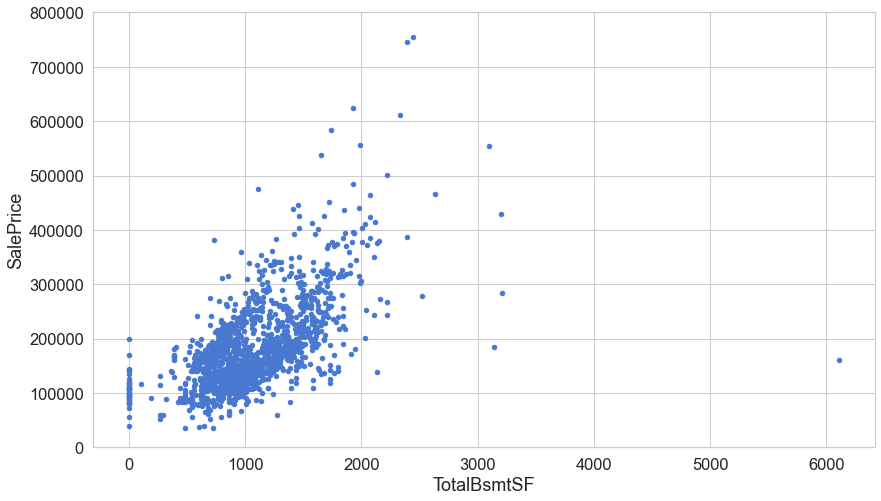

In [10]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

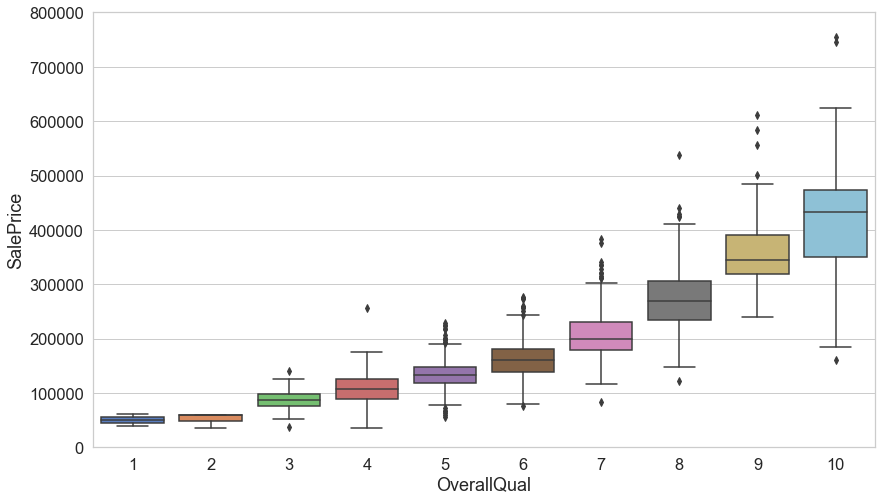

In [11]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

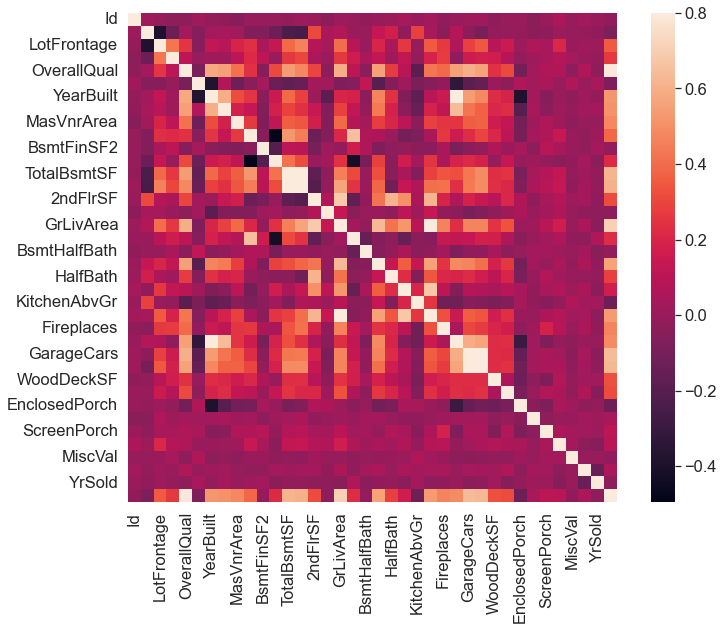

In [12]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

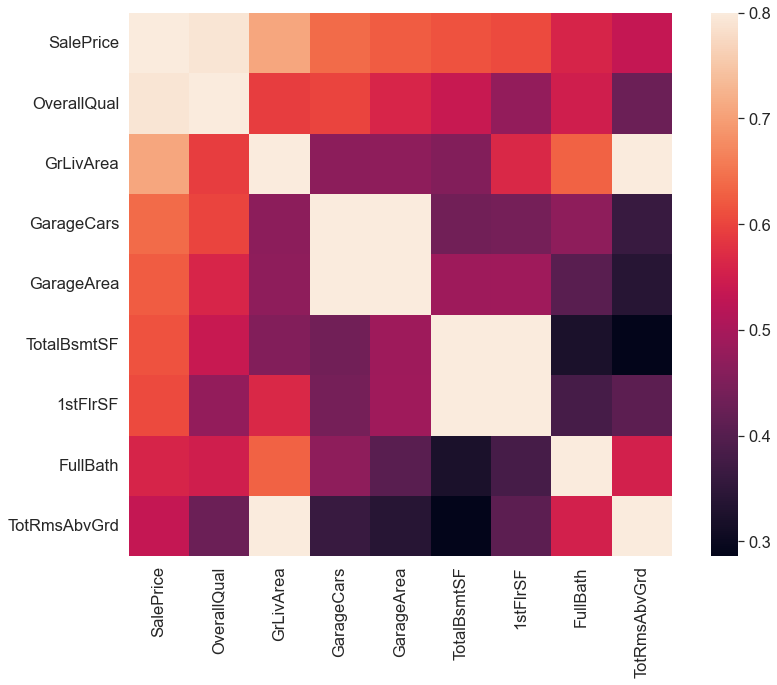

In [13]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);

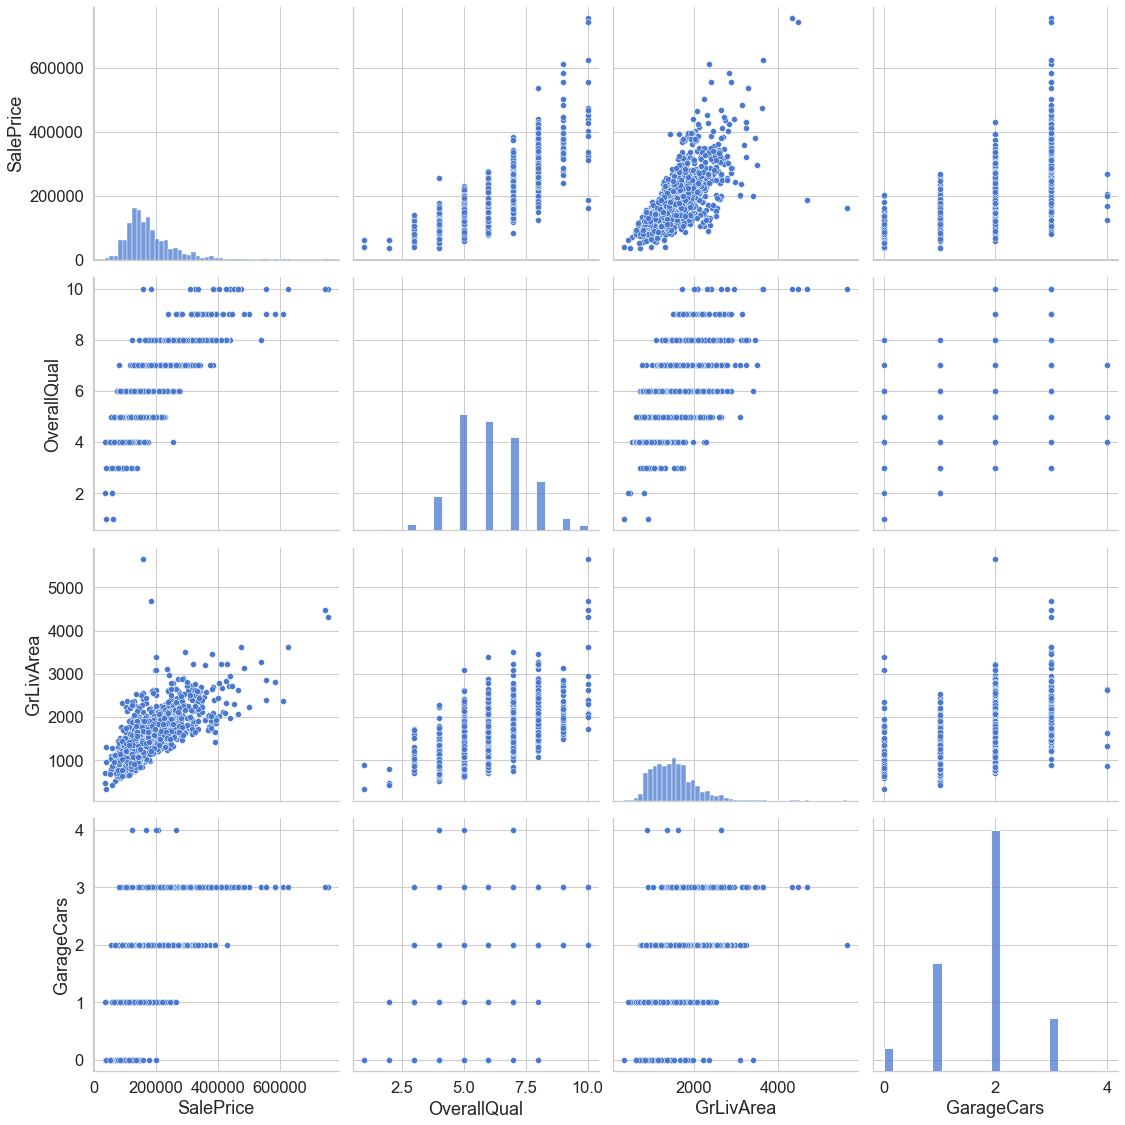

In [14]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(df_train[cols], size = 4);

In [15]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [63]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, LinearRegression
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import skew

In [57]:
#read data
train_data = pd.read_csv("house_price_dataset/train.csv")
test_data = pd.read_csv("house_price_dataset/test.csv")

In [58]:
# identify cat variables hidden as numerical
# convert categorical variables to dummy variables
# impute missing values using mean
# scale the data using power transformer
# log transform skewed features
  
def clean_train(train_to_clean):
    cont_vars = train_to_clean.select_dtypes(exclude="object").columns.values
    num_cat_vars = train_to_clean[cont_vars].loc[:,train_to_clean[cont_vars].nunique()<13].columns.values
    cont_vars = np.array([x for x in cont_vars.tolist() if x not in num_cat_vars.tolist()])

    skewd_feat = train_to_clean[cont_vars].apply(lambda x : skew(x,nan_policy='propagate'),axis=0)
    skewd_feat = skewd_feat[skewd_feat>0.7]
    train_to_clean[skewd_feat.index] = np.log1p(train_to_clean[skewd_feat.index])

    cat_vars = train_to_clean.select_dtypes(include="object").columns.values
    cat_vars = np.append(cat_vars,num_cat_vars)
    data_cat = pd.get_dummies(train_to_clean,columns=cat_vars)
    final = data_cat.set_index("Id")
    final = final.groupby(final.columns, axis = 1).transform(lambda x: x.fillna(x.mean())) 
    return final,skewd_feat
    
def clean_test(test_to_clean,transformed_train,skewd_feat):
    cont_vars = test_to_clean.select_dtypes(exclude="object").columns.values
    num_cat_vars = test_to_clean[cont_vars].loc[:,test_to_clean[cont_vars].nunique()<13].columns.values
    cont_vars = np.array([x for x in cont_vars.tolist() if x not in num_cat_vars.tolist()])
    test_to_clean[skewd_feat.index] = np.log1p(test_to_clean[skewd_feat.index])

    cat_vars = test_to_clean.select_dtypes(include="object").columns.values
    cat_vars = np.append(cat_vars,num_cat_vars)
    data_cat = pd.get_dummies(test_to_clean,columns=cat_vars)
    final = data_cat.set_index("Id")
    final = final.groupby(final.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
    final = final.T.reindex(index = transformed_train.columns.values).fillna(0).T
    return final
  

In [67]:
def fitlinearRegression(train_fit,target,**kwargs):
    train_y = target
    train_x = train_fit
    clf = LinearRegression(**kwargs)
    clf.fit(train_x,train_y)
    print("train loss:{}".format("test"))
    return clf

def predictLR(test_fit,clf):
    return clf.predict(test_fit)

In [59]:
def fitRidgeCV(train_fit,target,**kwargs):
    train_y = target
    train_x = train_fit
    clf = RidgeCV(**kwargs)
    clf.fit(train_x,train_y)
    print("train loss:{}".format("test"))
    return clf

def predictLassoCV(test_fit,clf):
    return clf.predict(test_fit)

In [60]:
def fitLassoCV(train_fit,target,**kwargs):
    train_y = target
    train_x = train_fit
    clf = LassoCV(**kwargs)
    clf.fit(train_x,train_y)
    print("train loss:{}".format("test"))
    return clf

def predictLassoCV(test_fit,clf):
    return clf.predict(test_fit)

In [68]:
def fitelasticCV(train_fit,target,**kwargs):
    train_y = target
    train_x = train_fit
    clf = ElasticNetCV(**kwargs)
    clf.fit(train_x,train_y)
    print("train loss:{}".format("test"))
    return clf

def predictElasticCV(test_fit,clf):
    return clf.predict(test_fit)

In [61]:
target = np.log1p(train_data["SalePrice"])
train_cleaned,skewd_feat = clean_train(train_data.drop("SalePrice",axis=1))
test_cleaned = clean_test(test_data,train_cleaned,skewd_feat)

In [70]:
train_final = train_cleaned
test_final = test_cleaned
lr_model = fitlinearRegression(train_cleaned,target,normalize=False)

train loss:test


In [62]:
ridge_alpha = [0.05, 0.1, 0.3, 1, 3, 5, 6,7,7.5,8,8.5,9,10,11,12, 15, 30, 50, 75,100]
train_final = train_cleaned
test_final = test_cleaned
ridgeCV_model = fitRidgeCV(train_cleaned,target,normalize=False,alphas=ridge_alpha,store_cv_values = True)

train loss:test


In [66]:
lasso_alpha = [1, 0.5, 0.1, 0.02, 0.001, 0.0003,0.0004,0.0005]
train_final = train_cleaned
test_final = test_cleaned
lassoCV_model = fitLassoCV(train_cleaned,target,cv=5, random_state=0,normalize=False,alphas=lasso_alpha)

train loss:test


In [69]:
elastic_alpha = [1, 0.5, 0.1, 0.02, 0.001, 0.0003,0.0004,0.0005]
train_final = train_cleaned
test_final = test_cleaned
elasticCV_model = fitelasticCV(train_cleaned,target,cv=5, random_state=0,normalize=False,alphas=elastic_alpha)

train loss:test


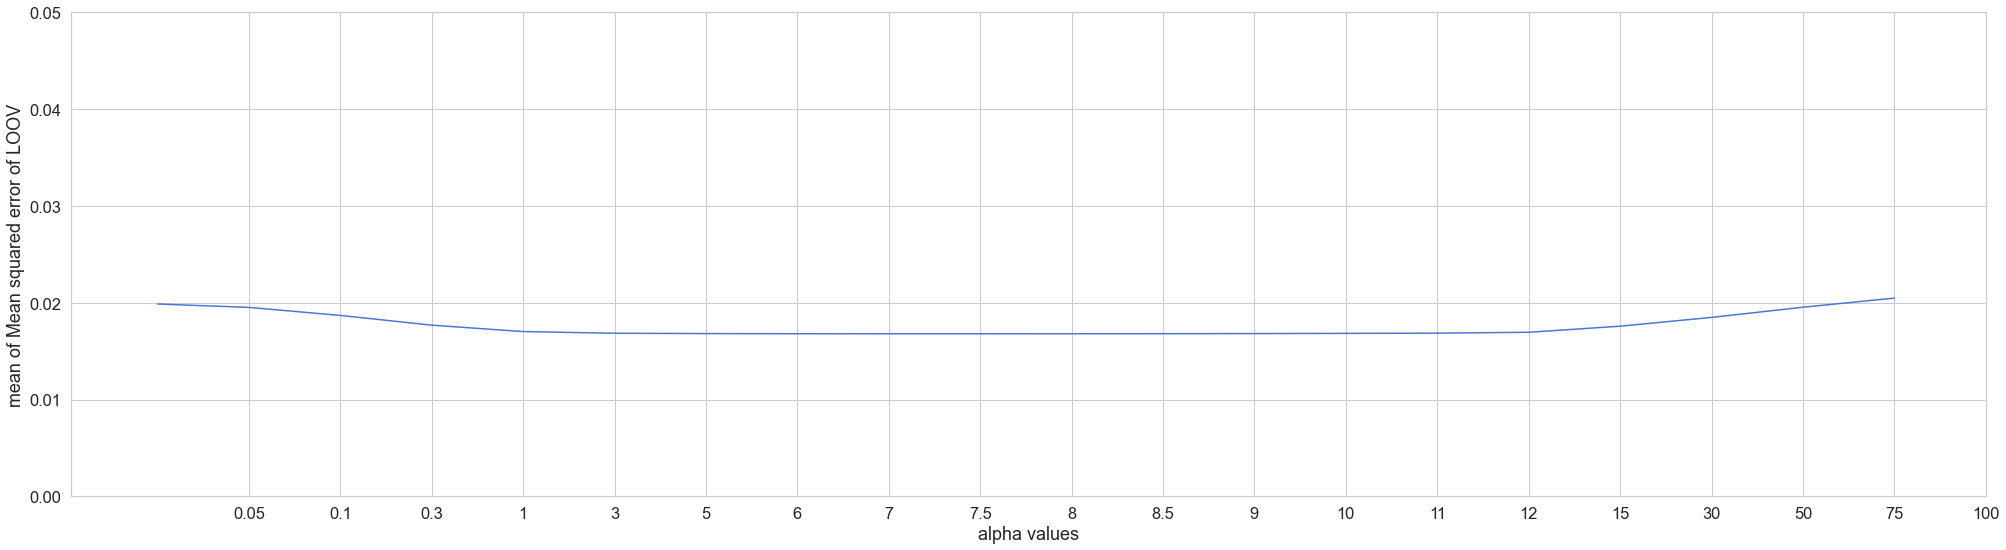

In [71]:
plt.plot(ridgeCV_model.cv_values_.mean(axis=0))
plt.xlabel("alpha values")
plt.ylabel("mean of Mean squared error of LOOV")
plt.ylim(0,0.05)
plt.xticks(range(1,len(ridge_alpha)+1),ridge_alpha)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)
plt.show()

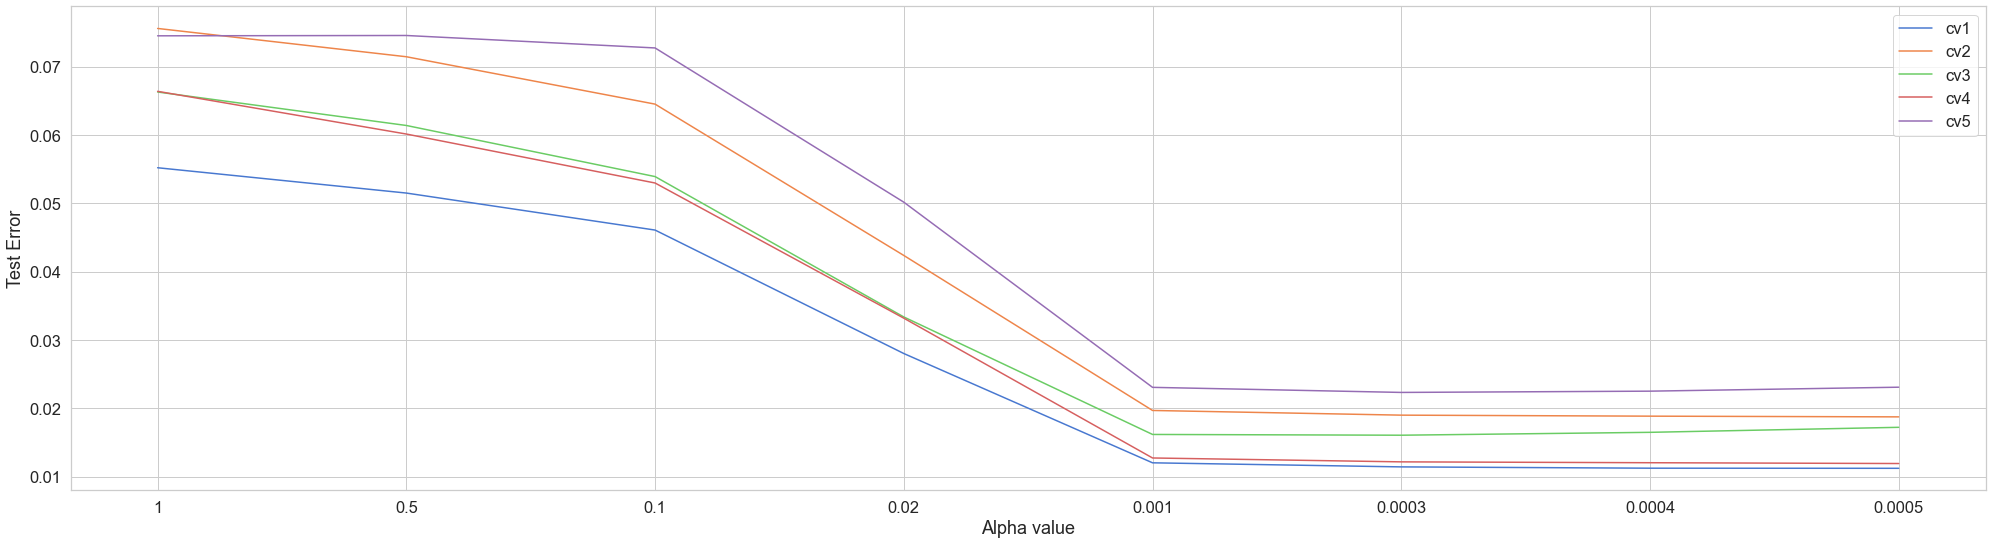

In [72]:
plt.plot(lassoCV_model.mse_path_)
plt.legend(["cv"+str(i) for i in range(1,lassoCV_model.mse_path_.shape[1]+1)])
plt.xticks(range(len(lasso_alpha)),lasso_alpha)
plt.xlabel("Alpha value")
plt.ylabel("Test Error")
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)
plt.show()

In [113]:
lr_output = lr_model.predict(test_cleaned)

ridge_output = ridgeCV_model.predict(test_cleaned)

lasso_output = lassoCV_model.predict(test_cleaned)

elastic_output = elasticCV_model.predict(test_cleaned)

In [114]:
lasso_coeff_values = lassoCV_model.coef_
lasso_coeff_values = pd.DataFrame(lasso_coeff_values,index=test_cleaned.columns.values)
lasso_coeff_values.sort_values(0)

,0
PoolArea_480,-0.338420
MSZoning_C (all),-0.336482
RoofMatl_ClyTile,-0.199597
OverallCond_3,-0.149552
Condition2_PosN,-0.138398
...,...
Neighborhood_StoneBr,0.093755
OverallQual_10,0.096171
Neighborhood_Crawfor,0.114383
OverallQual_9,0.148985


In [115]:
def writeoutput(output_df, filename, columns, index):
    csv_df = pd.DataFrame(output_df,columns=columns,index=index)
    csv_df.reset_index()
    csv_df.to_csv(filename)

In [116]:
writeoutput(np.expm1(lr_output),"lr_output.csv",["SalePrice"],test_data["Id"])
writeoutput(np.expm1(ridge_output),"ridgecv_output.csv",["SalePrice"],test_data["Id"])
writeoutput(np.expm1(lasso_output),"lassocv_output.csv", ["SalePrice"], test_data["Id"])
writeoutput(np.expm1(elastic_output),"elasticcv_output.csv", ["SalePrice"], test_data["Id"])
writeoutput(lasso_coeff_values.values,"Estimated_Coefficient_Values.csv", ["values"],lasso_coeff_values.index )

In [117]:
lr_output

array([11.93833349, 12.24031988, 12.33606602, ..., 12.22717038,
       11.91440466, 12.42910652])

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [119]:
len(target)

1459

In [120]:
target = target[0:1459]

In [127]:
(lr_output)

array([11.93833349, 12.24031988, 12.33606602, ..., 12.22717038,
       11.91440466, 12.42910652])

In [128]:
target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1454    12.128117
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
Name: SalePrice, Length: 1459, dtype: float64

In [122]:
from numpy import sqrt 

In [139]:
# Linear regression
rmse = sqrt(mean_squared_error(np.expm1(lr_output).tolist(), train_data["SalePrice"][0:1459]))
print('mse', mean_squared_error(np.expm1(lr_output).tolist(), train_data["SalePrice"][0:1459]))
print('mae', mean_absolute_error(np.expm1(lr_output).tolist(), train_data["SalePrice"][0:1459]))
print('rmse', rmse)

mse 15172947633.580633
mae 89749.27215931374
rmse 123178.5193675449


In [140]:
# Ridge regression
rmse = sqrt(mean_squared_error(np.expm1(ridge_output).tolist(), train_data["SalePrice"][0:1459]))
print('mse', mean_squared_error(np.expm1(ridge_output).tolist(), train_data["SalePrice"][0:1459]))
print('mae', mean_absolute_error(np.expm1(ridge_output).tolist(), train_data["SalePrice"][0:1459]))
print('rmse', rmse)

mse 11428458610.983374
mae 78887.12284689715
rmse 106903.96910771543


In [141]:
# Lasso regression
rmse = sqrt(mean_squared_error(np.expm1(lasso_output).tolist(), train_data["SalePrice"][0:1459]))
print('mse', mean_squared_error(np.expm1(lasso_output).tolist(), train_data["SalePrice"][0:1459]))
print('mae', mean_absolute_error(np.expm1(lasso_output).tolist(), train_data["SalePrice"][0:1459]))
print('rmse', rmse)

mse 11409416994.739283
mae 78618.62221103071
rmse 106814.87253533228


In [142]:
# Elastic regression
rmse = sqrt(mean_squared_error(np.expm1(elastic_output).tolist(), train_data["SalePrice"][0:1459]))
print('mse', mean_squared_error(np.expm1(elastic_output).tolist(), train_data["SalePrice"][0:1459]))
print('mae', mean_absolute_error(np.expm1(elastic_output).tolist(), train_data["SalePrice"][0:1459]))
print('rmse', rmse)

mse 11324118042.635548
mae 78421.71889920595
rmse 106414.83939110911
